# Monty Hall Simulation

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns


'''The function generates variables to store the result, generating pseudorandom doors for the player's initial 
choice of door and the door that hides the car. The number of doors in the game is generated followed by the doors
that are not the player's door. The final two doors remain at which point the result of the game is evaluated. '''

def monty_hall(num_of_doors):
    
    stick = 0
    switch = 0
    guess = random.randrange(1,(num_of_doors+1),1)
    car = random.randrange(1,(num_of_doors+1),1)
    doors = np.arange(1,num_of_doors+1)
    offered_doors = [i for i in doors if i != guess]
    
    #Selecting the door which is left after Monty has opened the other door
    if car != guess:
        montys_offer_door = [i for i in offered_doors if i == car][0]
    elif car == guess:
        montys_offer_door = random.choice(offered_doors)

    #Evaluation of whether to stick with the chosen door, or switch the door offered by Monty.    
    if montys_offer_door == car:
        switch = 1
    elif guess == car:
        stick = 1
        
    return switch, stick  

'''Simulating the game to find which strategy is best over a repeated number of games. Runs a loop and records the
cumulative scores over the number of games. The results are stored as an array to be used for visualisation'''

def simulation(num_sims,num_doors):
    
    switch_wins = 0
    cumul_switch_wins = []
    stick_wins = 0
    cumul_stick_wins = []
    
    for i in range(0,num_sims):
        run_game = monty_hall(num_doors)
        switch_wins += run_game[0]
        cumul_switch_wins.append(switch_wins)
        stick_wins += run_game[1]
        cumul_stick_wins.append(stick_wins)
    
    rounds = np.arange(1,num_sims+1)
    data = np.array([rounds,cum_switch_wins,cum_stick_wins])
    data = np.transpose(data)
    return data


In [135]:
# Run the simulation and store the result as a df.
sim = simulation(10000,3)
data = pd.DataFrame(sim, columns = ['round','switch_strategy', 'stick_strategy'])
data = data.set_index('round')

data.head()

,switch_strategy,stick_strategy
round,,
1,1,0
2,2,0
3,3,0
4,3,1
5,3,2


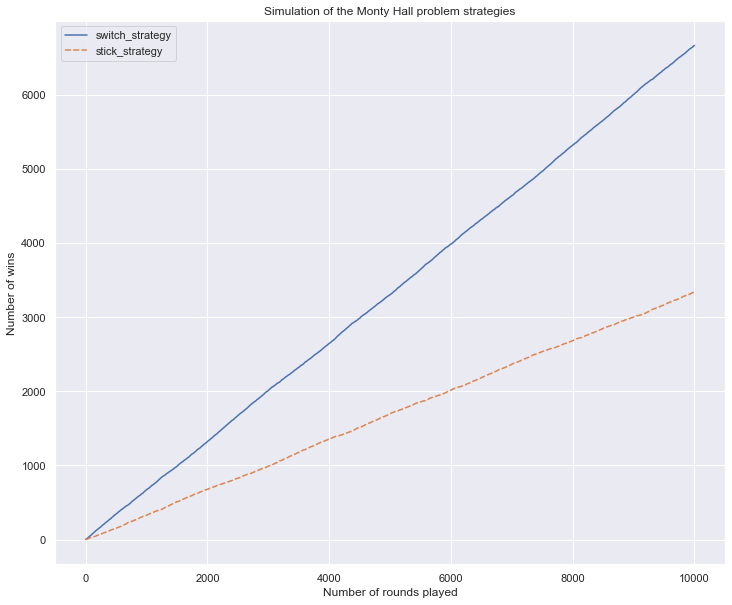

In [136]:
#Visualising the simulation
sns.set_theme()
f,ax = plt.subplots(figsize = (12,10))
ax = sns.lineplot(data=data)
ax.set(xlabel="Number of rounds played", ylabel="Number of wins", title='Simulation of the Monty Hall problem strategies')
plt.savefig('Cumulative scores plot 10k.png')
# plt.show()

In [137]:
# Evaluation of simulation

data['switch_win_percentage'] = ((data['switch_strategy']/data.index)*100).round(2)
data['stick_win_percentage'] = ((data['stick_strategy']/data.index)*100).round(2)
data.head()

,switch_strategy,stick_strategy,switch_win_percentage,stick_win_percentage
round,,,,
1,1,0,100.0,0.0
2,2,0,100.0,0.0
3,3,0,100.0,0.0
4,3,1,75.0,25.0
5,3,2,60.0,40.0


In [138]:
data.tail()

,switch_strategy,stick_strategy,switch_win_percentage,stick_win_percentage
round,,,,
9996,6658,3338,66.61,33.39
9997,6659,3338,66.61,33.39
9998,6660,3338,66.61,33.39
9999,6661,3338,66.62,33.38
10000,6662,3338,66.62,33.38


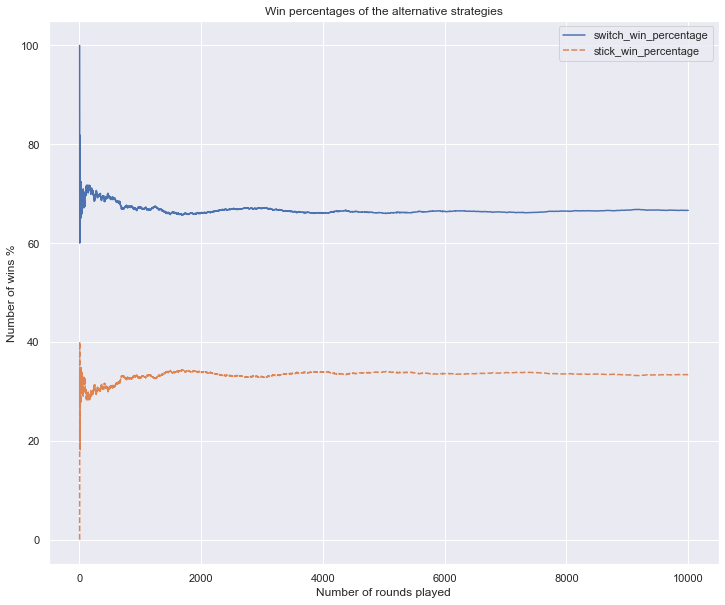

In [139]:
#Visualising the win percentages
win_percentages = data[["switch_win_percentage", "stick_win_percentage"]]
sns.set_theme()
f,ax = plt.subplots(figsize = (12,10))
ax = sns.lineplot(data=win_percentages)
ax.set(xlabel="Number of rounds played", ylabel="Number of wins %", title='Win percentages of the alternative strategies')
plt.savefig('win_percentage 10k.png')
# plt.show()

In [140]:
win_percentages.tail()

,switch_win_percentage,stick_win_percentage
round,,
9996,66.61,33.39
9997,66.61,33.39
9998,66.61,33.39
9999,66.62,33.38
10000,66.62,33.38
